## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [128,512,1024]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-BATCH_SIZE-%s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 128.000000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________

50000/50000 [==============================] - 12s 234us/step - loss: 0.3193 - acc: 0.8907 - val_loss: 2.7214 - val_acc: 0.4241
Epoch 45/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.3127 - acc: 0.8922 - val_loss: 2.5237 - val_acc: 0.4432
Epoch 46/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.3029 - acc: 0.8967 - val_loss: 2.5444 - val_acc: 0.4671
Epoch 47/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.3063 - acc: 0.8952 - val_loss: 2.4308 - val_acc: 0.4588
Epoch 48/50
50000/50000 [==============================] - 12s 233us/step - loss: 0.2909 - acc: 0.8997 - val_loss: 2.4739 - val_acc: 0.4526
Epoch 49/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.2777 - acc: 0.9038 - val_loss: 2.5093 - val_acc: 0.4529
Epoch 50/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.2730 - acc: 0.9067 - val_loss: 2.4193 - val_acc: 0.4818
Experiment with BATCH_SIZE = 512

50000/50000 [==============================] - 10s 191us/step - loss: 0.3487 - acc: 0.9066 - val_loss: 1.8477 - val_acc: 0.4937
Epoch 43/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.3295 - acc: 0.9144 - val_loss: 1.9346 - val_acc: 0.4689
Epoch 44/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.3180 - acc: 0.9175 - val_loss: 1.9748 - val_acc: 0.4828
Epoch 45/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.2997 - acc: 0.9232 - val_loss: 1.9649 - val_acc: 0.4841
Epoch 46/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.2802 - acc: 0.9300 - val_loss: 1.9689 - val_acc: 0.4806
Epoch 47/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.2658 - acc: 0.9360 - val_loss: 1.9877 - val_acc: 0.4818
Epoch 48/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.2546 - acc: 0.9398 - val_loss: 2.0019 - val_acc: 0.4810
Epoch 49/50
50000/50000 [============

50000/50000 [==============================] - 8s 155us/step - loss: 0.6756 - acc: 0.7917 - val_loss: 1.5667 - val_acc: 0.4923
Epoch 41/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.6551 - acc: 0.8011 - val_loss: 1.5615 - val_acc: 0.4927
Epoch 42/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.6384 - acc: 0.8067 - val_loss: 1.5639 - val_acc: 0.4962
Epoch 43/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.6200 - acc: 0.8153 - val_loss: 1.5968 - val_acc: 0.4959
Epoch 44/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.6024 - acc: 0.8210 - val_loss: 1.6099 - val_acc: 0.4867
Epoch 45/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.5843 - acc: 0.8290 - val_loss: 1.6075 - val_acc: 0.4936
Epoch 46/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.5672 - acc: 0.8350 - val_loss: 1.6096 - val_acc: 0.4946
Epoch 47/50
50000/50000 [=============

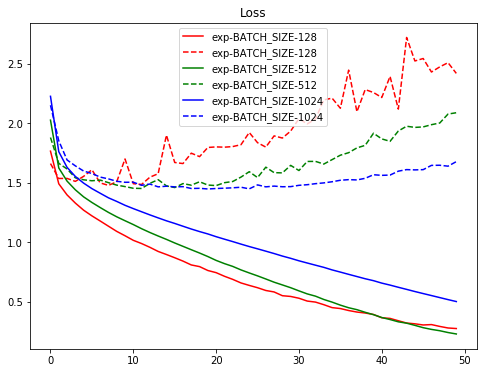

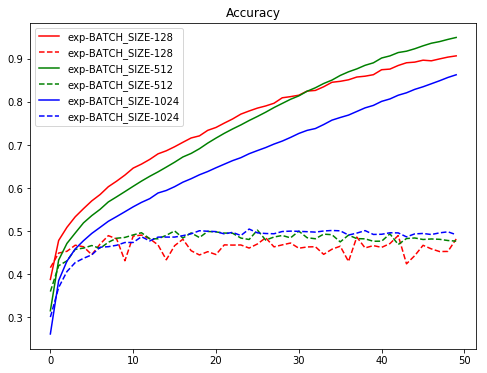

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()